<a href="https://colab.research.google.com/github/DKAbir111/Human-Disease-Prediction_FRP/blob/main/Human_Disease_Prediction__EDA_Final_Year_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1267]:
# Importing necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import seaborn as sns  # Seaborn for statistical data visualization
import warnings  # Warnings library for managing warnings during code execution

# Suppressing warning messages to keep the output clean
warnings.filterwarnings("ignore")

**Mount Drive**

In [1268]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read CSV for disease data analysis**

In [1269]:
df=pd.read_csv("/content/drive/MyDrive/Final Year Research/My Data set/Necessary Data/dataset.csv")

In [1270]:
df.head(5)# Displaying the first 5 rows of the training data DataFrame

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Removing Hyphen From the data**

In [1271]:
# Iterate through each column in the Data
for col in df.columns:

    # Replace underscores with spaces in the values of the current column
    df[col] = df[col].str.replace('_', ' ')

# Display the few sample rows of the modified Data
df.sample(5)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
1378,Jaundice,itching,vomiting,fatigue,weight loss,high fever,yellowish skin,abdominal pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,Impetigo,skin rash,high fever,blister,red sore around nose,yellow crust ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4836,Psoriasis,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,Hepatitis E,joint pain,fatigue,high fever,yellowish skin,dark urine,nausea,loss of appetite,abdominal pain,yellowing of eyes,acute liver failure,coma,stomach bleeding,NaN,NaN,NaN,NaN,NaN
4902,Hepatitis E,joint pain,vomiting,fatigue,high fever,yellowish skin,dark urine,nausea,loss of appetite,abdominal pain,yellowing of eyes,acute liver failure,coma,stomach bleeding,NaN,NaN,NaN,NaN


**Remove the trailing space from the symptom columns**

In [1272]:
# Get the column names of the original DataFrame
cols = df.columns
# Flatten the DataFrame values into a 1D array
data = df[cols].values.flatten()
# Create a pandas Series from the flattened data
s = pd.Series(data)
# Remove leading and trailing whitespaces from each element in the Series
s = s.str.strip()
# Reshape the 1D array back into the original DataFrame shape
s = s.values.reshape(df.shape)
# Create a new DataFrame with the cleaned values and original column names
df = pd.DataFrame(s, columns=df.columns)
# Display the first few rows of the cleaned DataFrame
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Describe some characteristics of data**

In [1273]:
print(df.shape)#Shape of data set

(4920, 18)


In [1274]:
df.dtypes# Retrieving the data types of each column in the DataFrame 'data'

Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
Symptom_11    object
Symptom_12    object
Symptom_13    object
Symptom_14    object
Symptom_15    object
Symptom_16    object
Symptom_17    object
dtype: object

In [1275]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,muscle pain,chest pain,chest pain,blood in sputum,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [1276]:
df.info()# Print a summary of the DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


**Checking the null value of the data**

In [1277]:
# Check for null values in each column and create a DataFrame with the counts
null_checker = df.isnull().sum().to_frame(name='Null Count')
# Print the DataFrame showing the count of null values for each column
print(null_checker)


            Null Count
Disease              0
Symptom_1            0
Symptom_2            0
Symptom_3            0
Symptom_4          348
Symptom_5         1206
Symptom_6         1986
Symptom_7         2652
Symptom_8         2976
Symptom_9         3228
Symptom_10        3408
Symptom_11        3726
Symptom_12        4176
Symptom_13        4416
Symptom_14        4614
Symptom_15        4680
Symptom_16        4728
Symptom_17        4848


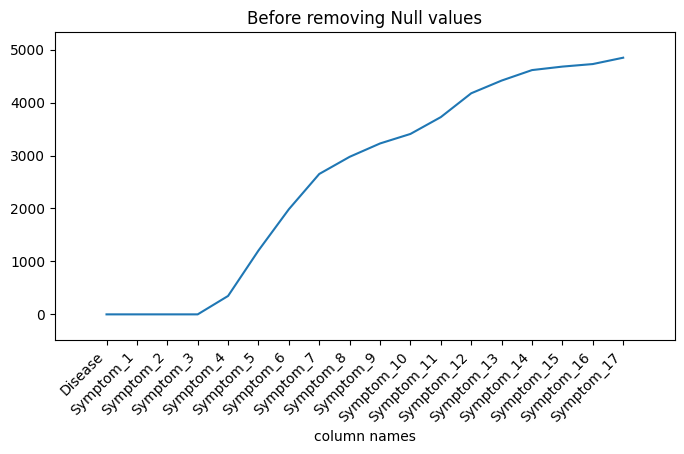

In [1278]:
# Set the figure size for the plot
plt.figure(figsize=(8, 4))

# Plotting the null counts for each column
plt.plot(null_checker.index, null_checker['Null Count'])

# Set the x-axis ticks and rotate them for better visibility
plt.xticks(null_checker.index, null_checker.index, rotation=45, horizontalalignment='right')

# Set the title for the plot
plt.title('Before removing Null values')

# Label the x-axis
plt.xlabel('column names')

# Adjust margins for better layout
plt.margins(0.1)

# Display the plot
plt.show()


**Fill the NaN values with zero**

In [1279]:
df = df.fillna(0)
df.sample(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4280,Chicken pox,itching,skin rash,fatigue,lethargy,high fever,headache,loss of appetite,mild fever,swelled lymph nodes,malaise,red spots over body,0,0,0,0,0,0
2886,Chicken pox,itching,skin rash,fatigue,lethargy,high fever,headache,loss of appetite,mild fever,swelled lymph nodes,malaise,red spots over body,0,0,0,0,0,0
3117,Allergy,continuous sneezing,shivering,chills,watering from eyes,0,0,0,0,0,0,0,0,0,0,0,0,0
2150,Hypertension,headache,chest pain,dizziness,loss of balance,lack of concentration,0,0,0,0,0,0,0,0,0,0,0,0
1868,Hepatitis D,joint pain,vomiting,fatigue,yellowish skin,dark urine,nausea,loss of appetite,yellowing of eyes,0,0,0,0,0,0,0,0,0


In [1280]:
# Extract all symptom columns
symptom_columns = df.columns[1:]  # Exclude the first column (assuming it is the disease column)

# Create a new DataFrame with symptoms only
symptoms_df = df[symptom_columns]

# Reshape the DataFrame to have a single column for symptoms
all_symptoms = symptoms_df.values.flatten()

# Filter out the value 0 from the symptoms
filtered_symptoms = all_symptoms[all_symptoms != 0]

# Count occurrences of each symptom (excluding 0)
symptom_counts = pd.Series(filtered_symptoms).value_counts()

# Display all unique symptoms and their corresponding count values
for rank, (symptom, count) in enumerate(symptom_counts.items(), start=1):
    print(f"{rank}. {symptom}, Count: {count}")

1. fatigue, Count: 1932
2. vomiting, Count: 1914
3. high fever, Count: 1362
4. loss of appetite, Count: 1152
5. nausea, Count: 1146
6. headache, Count: 1134
7. abdominal pain, Count: 1032
8. yellowish skin, Count: 912
9. yellowing of eyes, Count: 816
10. chills, Count: 798
11. skin rash, Count: 786
12. malaise, Count: 702
13. chest pain, Count: 696
14. joint pain, Count: 684
15. sweating, Count: 678
16. itching, Count: 678
17. dark urine, Count: 570
18. diarrhoea, Count: 564
19. cough, Count: 564
20. irritability, Count: 474
21. muscle pain, Count: 474
22. excessive hunger, Count: 462
23. lethargy, Count: 456
24. weight loss, Count: 456
25. breathlessness, Count: 450
26. phlegm, Count: 354
27. mild fever, Count: 354
28. swelled lymph nodes, Count: 348
29. blurred and distorted vision, Count: 342
30. loss of balance, Count: 342
31. dizziness, Count: 336
32. abnormal menstruation, Count: 240
33. muscle weakness, Count: 234
34. depression, Count: 234
35. red spots over body, Count: 234
36

**Symptom severity rank**

In [1281]:
dfs=pd.read_csv("/content/drive/MyDrive/Final Year Research/My Data set/Necessary Data/Symptom-severity.csv")

In [1282]:
dfs.sample(5)

,Symptom,weight
0,itching,1
33,dark_urine,4
74,excessive_hunger,4
53,sinus_pressure,4
7,stomach_pain,5


In [1283]:
dfs['Symptom'] = dfs['Symptom'].str.replace('_',' ')
dfs.head(5)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [1284]:
symptoms_data = pd.DataFrame(dfs)

# Create groups based on weights
groups = symptoms_data.groupby('weight')

# Print each group
for weight, group in groups:
    print(f"Weight {weight}: {', '.join(group['Symptom'].tolist())}")

Weight 1: itching
Weight 2: lethargy, hip joint pain, muscle weakness, irritability, muscle pain, altered sensorium, receiving unsterile injections, painful walking, pus filled pimples, blackheads, scurring, silver like dusting, small dents in nails, inflammatory nails, red sore around nose
Weight 3: skin rash, chills, joint pain, acidity, muscle wasting, weight gain, mood swings, weight loss, sunken eyes, sweating, headache, yellowish skin, back pain, knee pain, loss of smell, depression, red spots over body, lack of concentration, visual disturbances, skin peeling, yellow crust ooze
Weight 4: nodal skin eruptions, continuous sneezing, ulcers on tongue, fatigue, anxiety, cough, breathlessness, dehydration, dark urine, loss of appetite, pain behind the eyes, constipation, abdominal pain, yellow urine, yellowing of eyes, throat irritation, sinus pressure, dizziness, cramps, bruising, obesity, excessive hunger, drying and tingling lips, slurred speech, stiff neck, loss of balance, unstea

**Total Unique Symptom according to Symptom Sevarity list**

In [1285]:
dfs['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

**Encode Symptomn of df(Disease data) according to the sevarity of syptoms from dfs(Symptom Sevarity)**

In [1286]:
# Extract the values from the original DataFrame
vals = df.values

# Get unique symptoms from another DataFrame 'dfs'
symptoms = dfs['Symptom'].unique()

# Iterate over each unique symptom
for i in range(len(symptoms)):
    # Replace values in 'vals' with corresponding weights from 'dfs'
    vals[vals == symptoms[i]] = dfs[dfs['Symptom'] == symptoms[i]]['weight'].values[0]

# Create a new DataFrame 'd' with the updated values and original column names
dummy = pd.DataFrame(vals, columns=cols)

# Display the first few rows of the updated DataFrame
dummy.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Assign symptoms with no rank to zero**

In [1287]:
dummy = dummy.replace('dischromic  patches', 0)
dummy = dummy.replace('spotting  urination',0)
df = dummy.replace('foul smell of urine',0)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Checking the data frame after handling null value**

In [1288]:
# Check for null values in each column and create a DataFrame with the counts
null_checker = df.isnull().sum().to_frame(name='Null Count')
# Print the DataFrame showing the count of null values for each column
print(null_checker)

            Null Count
Disease              0
Symptom_1            0
Symptom_2            0
Symptom_3            0
Symptom_4            0
Symptom_5            0
Symptom_6            0
Symptom_7            0
Symptom_8            0
Symptom_9            0
Symptom_10           0
Symptom_11           0
Symptom_12           0
Symptom_13           0
Symptom_14           0
Symptom_15           0
Symptom_16           0
Symptom_17           0


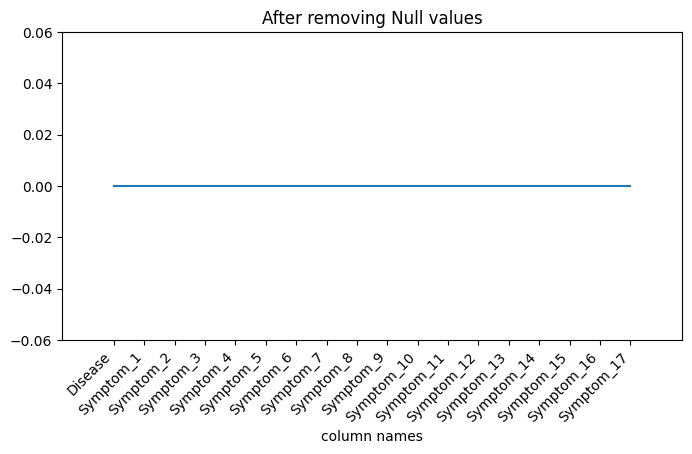

In [1289]:
# Set the figure size for the plot
plt.figure(figsize=(8, 4))

# Plotting the null counts for each column
plt.plot(null_checker.index, null_checker['Null Count'])

# Set the x-axis ticks and rotate them for better visibility
plt.xticks(null_checker.index, null_checker.index, rotation=45, horizontalalignment='right')

# Set the title for the plot
plt.title('After removing Null values')

# Label the x-axis
plt.xlabel('column names')

# Adjust margins for better layout
plt.margins(0.1)

# Display the plot
plt.show()


**Total number of symptom and predicted Disease**

In [1290]:
print("Number of symptoms used to identify the disease ",len(dfs['Symptom'].unique()))
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


In [1291]:
df['Disease'].unique()# Retrieving unique values in the 'attack_cat' column

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [1292]:
# Function to plot a bar graph of value counts for a given feature
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

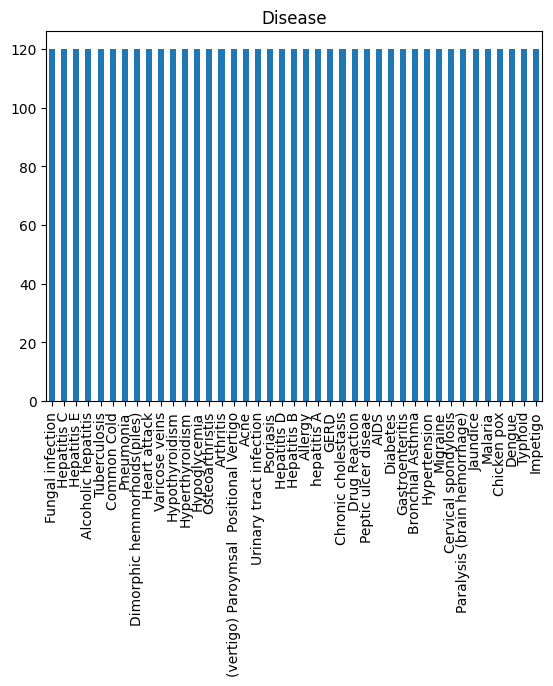

In [1293]:
plt.title("Disease")# Setting the title for the bar graph
bar_graph('Disease')# Calling the bar_graph function to plot value counts for the 'Disease' column

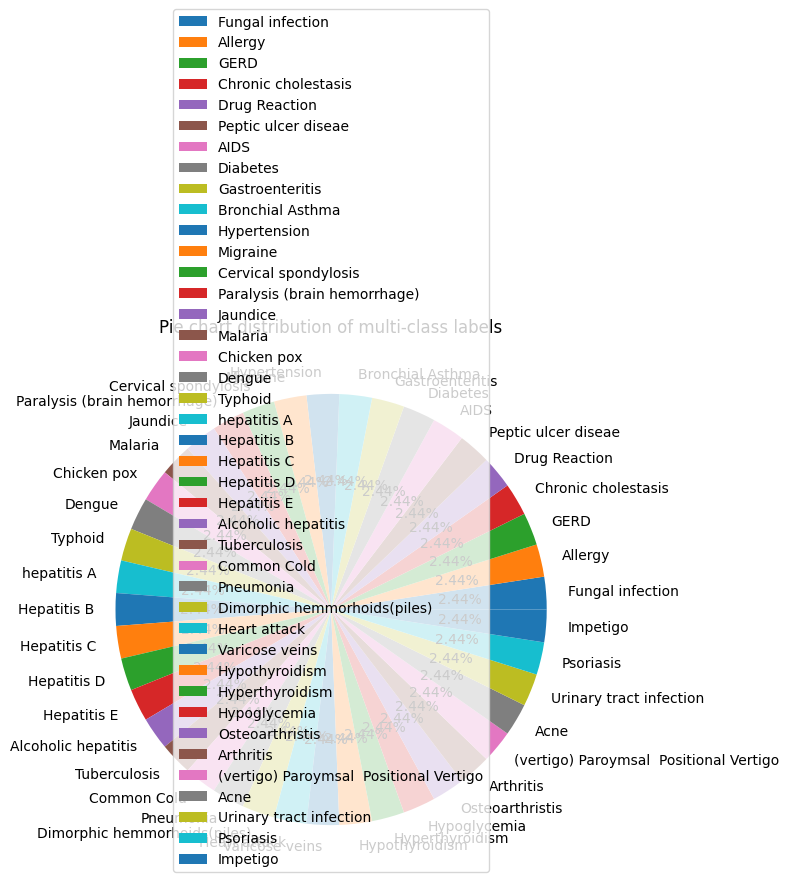

In [1294]:
# Setting the figure size for the pie chart
plt.figure(figsize=(15, 7))

# Creating a pie chart based on the value counts of 'Disease'
plt.pie(df['Disease'].value_counts(), labels=df['Disease'].unique(), autopct='%0.2f%%')

# Setting the title for the pie chart
plt.title('Pie chart distribution of multi-class labels')

# Adding a legend to the pie chart
plt.legend()

# Saving the pie chart as an image file
plt.savefig('Pie_chart_multi.png')

# Displaying the pie chart
plt.show()



# **Heat Map with Corelational Matrix**

In [1295]:
# Importing the LabelEncoder class from scikit-learn for categorical variable encoding
from sklearn.preprocessing import LabelEncoder

In [1296]:
# Creating a copy of the DataFrame for heatmap visualization
heatmap = df.copy()

# List of categorical columns to be encoded
cat_cols = ["Disease"]

# Initializing a LabelEncoder
le = LabelEncoder()

# Encoding categorical columns in the DataFrame
for col in cat_cols:
    heatmap[col] = le.fit_transform(heatmap[col])

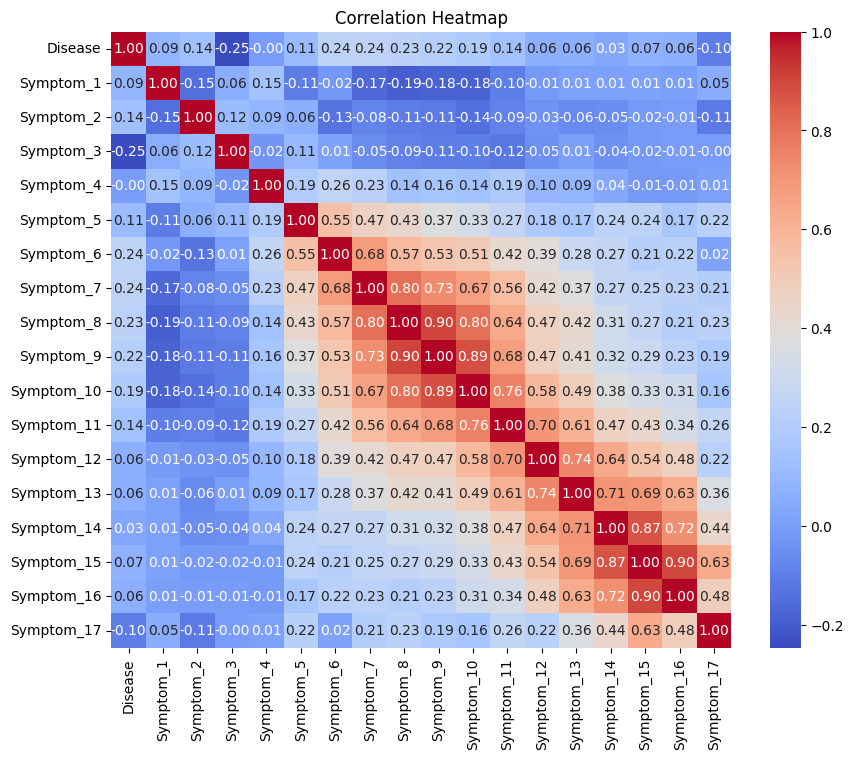

In [1297]:
dummy = heatmap.copy()

# Creating a correlation matrix from the selected columns in the DataFrame 'dummy'
correlation_matrix = dummy.corr()

# Setting the figure size for the correlation heatmap
plt.figure(figsize=(10, 8))

# Creating a heatmap with annotations, using the 'coolwarm' colormap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Setting the title for the correlation heatmap
plt.title("Correlation Heatmap")

# Displaying the correlation heatmap
plt.show()


In [1298]:
df.shape

(4920, 18)

In [1299]:
X = df.drop(['Disease'], axis=1) #independent columns
y = df[['Disease']]   #target column

**Feature Selection**

In [1300]:
# Import necessary libraries for feature selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Instantiate SelectKBest with the desired score function (f_classif in this case)
test = SelectKBest(score_func=f_classif)

# Fit SelectKBest on the features and target variable
test.fit(X, y)

# Extract the scores of the features
scores = pd.DataFrame(test.scores_)

# Create DataFrames for feature names and their corresponding scores
columns = pd.DataFrame(X.columns)
featureScores = pd.concat([columns, scores], axis=1)
featureScores.columns = ['Features', 'Score']


In [1301]:
# Print the top 17 features based on their scores
print(featureScores.nlargest(17, 'Score'))

      Features        Score
8    Symptom_9  2606.459148
7    Symptom_8  2569.084135
13  Symptom_14  1932.792405
14  Symptom_15  1634.415417
9   Symptom_10  1285.557710
11  Symptom_12  1147.193574
6    Symptom_7   859.788066
0    Symptom_1   668.650764
10  Symptom_11   552.827054
5    Symptom_6   549.810652
12  Symptom_13   536.304054
4    Symptom_5   504.660909
1    Symptom_2   427.804462
15  Symptom_16   293.113782
2    Symptom_3   184.106042
16  Symptom_17   178.500000
3    Symptom_4   142.913557


**Scalling- Using Strandard Scaling**

In [1302]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [1303]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3936, 17)
Testing set shape: (984, 17)


In [1304]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#x' = (x- mean)/std

# transform train and test sets
X_train_new = scaler.fit_transform(X_train)
X_test_new= scaler.transform(X_test)

In [1305]:
X_train_new

array([[-1.81239212, -0.93256739, -0.02342815, ..., -0.21803043,
        -0.19210564, -0.12336106],
       [-0.29831478,  0.69627009, -0.02342815, ..., -0.21803043,
        -0.19210564, -0.12336106],
       [-1.81239212, -0.11814865, -1.46425911, ..., -0.21803043,
        -0.19210564, -0.12336106],
       ...,
       [-0.29831478, -0.93256739, -0.74384363, ..., -0.21803043,
        -0.19210564, -0.12336106],
       [-1.81239212, -0.93256739, -0.02342815, ..., -0.21803043,
        -0.19210564, -0.12336106],
       [-1.81239212, -0.93256739,  0.69698734, ..., -0.21803043,
        -0.19210564, -0.12336106]])

In [1306]:
X_test_new

array([[-0.29831478, -1.74698613, -1.46425911, ..., -0.21803043,
        -0.19210564, -0.12336106],
       [-0.29831478, -1.74698613, -1.46425911, ..., -0.21803043,
        -0.19210564, -0.12336106],
       [ 0.45872389, -0.93256739, -0.74384363, ..., -0.21803043,
        -0.19210564, -0.12336106],
       ...,
       [-0.29831478, -0.93256739, -0.74384363, ..., -0.21803043,
        -0.19210564, -0.12336106],
       [-0.29831478, -1.74698613, -1.46425911, ..., -0.21803043,
        -0.19210564, -0.12336106],
       [ 1.21576256, -0.93256739, -0.02342815, ..., -0.21803043,
        -0.19210564, -0.12336106]])

In [1307]:
X_train= np.round(X_train_new, 1)
X_test= np.round(X_test_new, 1)

In [1308]:
print("X_train after scalling = \n",X_train)
print("\nX_test after scalling = \n",X_test)

X_train after scalling = 
 [[-1.8 -0.9 -0.  ... -0.2 -0.2 -0.1]
 [-0.3  0.7 -0.  ... -0.2 -0.2 -0.1]
 [-1.8 -0.1 -1.5 ... -0.2 -0.2 -0.1]
 ...
 [-0.3 -0.9 -0.7 ... -0.2 -0.2 -0.1]
 [-1.8 -0.9 -0.  ... -0.2 -0.2 -0.1]
 [-1.8 -0.9  0.7 ... -0.2 -0.2 -0.1]]

X_test after scalling = 
 [[-0.3 -1.7 -1.5 ... -0.2 -0.2 -0.1]
 [-0.3 -1.7 -1.5 ... -0.2 -0.2 -0.1]
 [ 0.5 -0.9 -0.7 ... -0.2 -0.2 -0.1]
 ...
 [-0.3 -0.9 -0.7 ... -0.2 -0.2 -0.1]
 [-0.3 -1.7 -1.5 ... -0.2 -0.2 -0.1]
 [ 1.2 -0.9 -0.  ... -0.2 -0.2 -0.1]]


In [1309]:
X_train.dtype

dtype('float64')

**Cross Validation**

In [1310]:
# Import necessary libraries for cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Create an instance of Logistic Regression model
logr1 = LogisticRegression()

# Perform 5-fold cross-validation and obtain scores
score = cross_val_score(logr1, X, y, cv=5)

# Print the cross-validation scores for each fold
print("Cross Validation Scores are {}".format(score))

# Print the average cross-validation score (test data accuracy)
print("Average Cross Validation (Test data accuracy): {}".format(score.mean()))



Cross Validation Scores are [0.81199187 0.79776423 0.91768293 1.         1.        ]
Average Cross Validation (Test data accuracy): 0.9054878048780488


# **Randomly choose 5,10,15 and 17 symptom for prediction**

In [1311]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

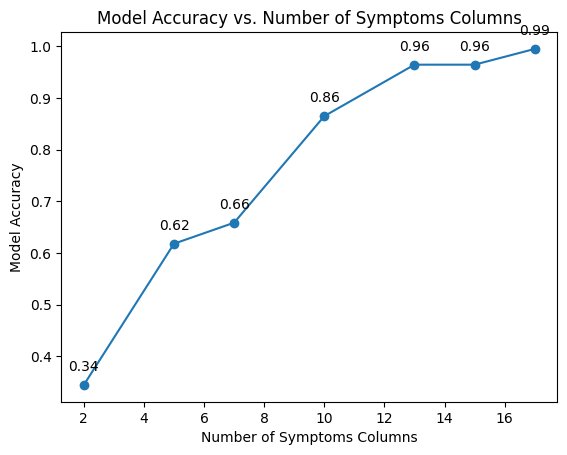

In [1312]:
accuracies = []
column_counts = []

# Randomly select 5, 10, 15, and 17 symptoms columns
for i in [2, 5,7,10,13, 15, 17]:
    selected_columns = np.random.choice(X.columns, i, replace=False)
    X_subset = X[selected_columns]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_model = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_model)

    # Append results to lists
    accuracies.append(accuracy)
    column_counts.append(i)

# Plot the results with accuracy annotations
plt.plot(column_counts, accuracies, marker='o')
for i, txt in enumerate(accuracies):
    plt.annotate(f'{txt:.2f}', (column_counts[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Model Accuracy vs. Number of Symptoms Columns')
plt.xlabel('Number of Symptoms Columns')
plt.ylabel('Model Accuracy')
plt.show()

# **Applying Diffrent ML Model**

In [1313]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc

# **Logistic Regration**

In [1314]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression()

In [1315]:
lgr.score(X_train, y_train)*100

91.9461382113821

In [1316]:
lgr.score(X_test, y_test)*100
pred=lgr.predict(X_test)

**Classification Report of LR**

In [1317]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,pred)
print(cr)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      0.83      0.91        18
                                   AIDS       0.90      0.87      0.88        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      0.88      0.94        25
                                Allergy       0.70      0.79      0.75        24
                              Arthritis       1.00      0.91      0.95        23
                       Bronchial Asthma       0.89      0.48      0.63        33
                   Cervical spondylosis       0.61      0.61      0.61        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       0.76      0.87      0.81        15
                            Common Cold       1.00      1.00      1.00        23
                           

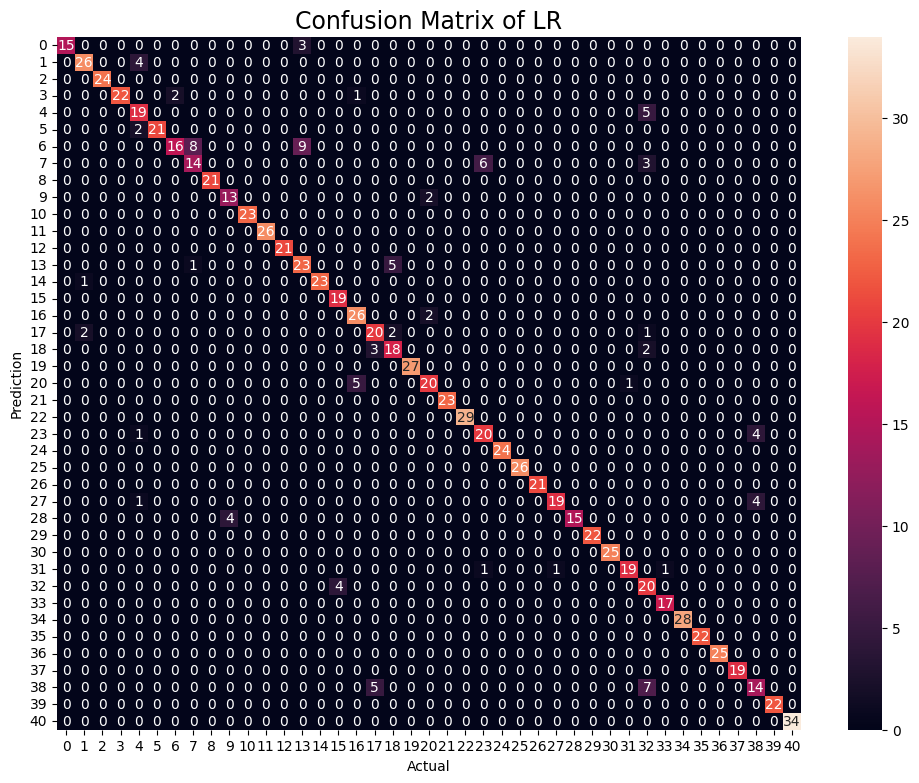

Accuracy   : 0.8953252032520326


In [1318]:
# compute the confusion matrix
cm = confusion_matrix(y_test,pred)
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of LR',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(y_test, pred)
print("Accuracy   :", accuracy)

# **KNeighborsClassifier**

In [1319]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
pred1 = kn.predict(X_test)
cr1 = classification_report(y_test,pred1)
print(cr1)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       0.92      1.00      0.96        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      0.87      0.93        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
                           

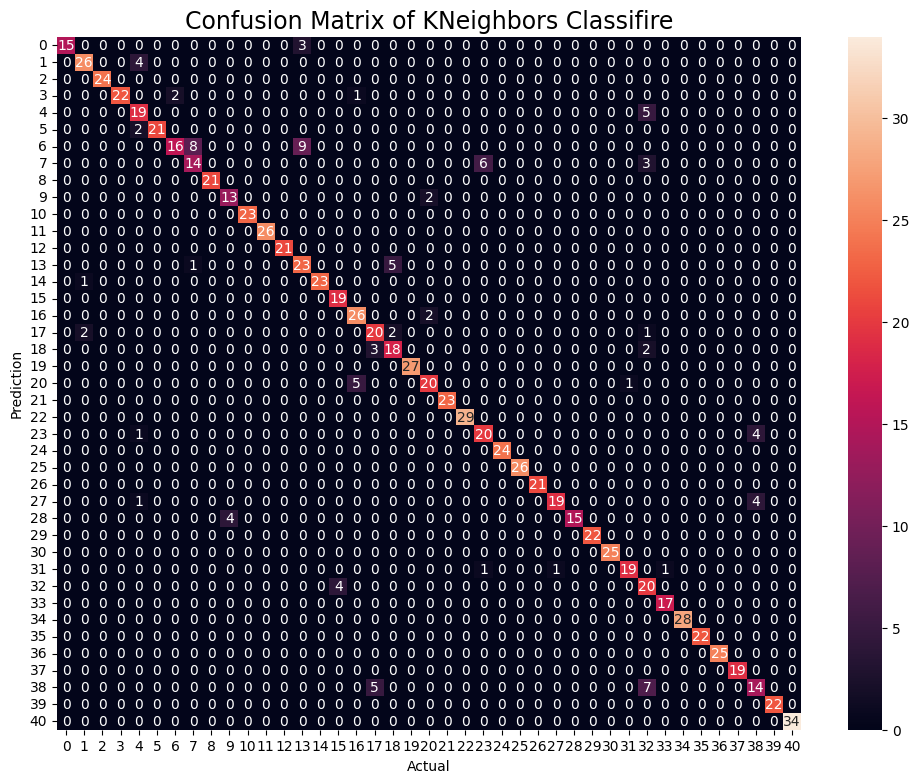

Accuracy   : 0.99


In [1320]:
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of KNeighbors Classifire',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(y_test, pred1)
print("Accuracy   : {:.2f}".format(accuracy))

# **DecisionTreeClassifier**

In [1321]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test, y_test)
pred2 = dt.predict(X_test)
cr2 = classification_report(y_test,pred2)
print(cr2)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       0.92      1.00      0.96        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      0.87      0.93        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
                           

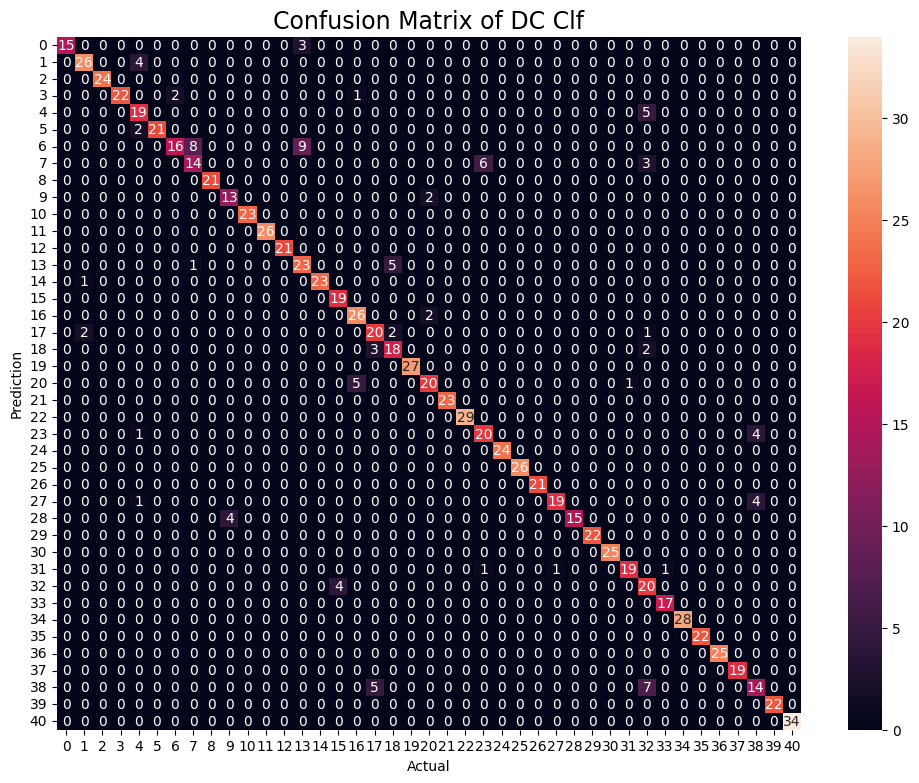

Accuracy   : 0.99


In [1322]:
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of DC Clf',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(y_test, pred2)
print("Accuracy   : {:.2f}".format(accuracy))

In [1323]:
# from sklearn import tree
# plt.figure(figsize=(30, 20))
# features= df.columns
# tree.plot_tree(dt, feature_names = features) #plotting the decision tree
# plt.show()

# **RandomForestClassifier**

In [1324]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred3 = rf.predict(X_test)
cr3 = classification_report(y_test,pred3)
print(cr3)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       0.92      1.00      0.96        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      0.87      0.93        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.00        23
                           

In [ ]:
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of Random Forest CLF',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(y_test, pred3)
print("Accuracy   : {:.2f}".format(accuracy))

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
sv.score(X_test, y_test)
pred4 = sv.predict(X_test)
cr4 = classification_report(y_test,pred3)
print(cr4)

In [ ]:
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of SVM',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(y_test, pred4)
print("Accuracy   : {:.2f}".format(accuracy))

# **Bagging Classifier**

In [ ]:
#Bagging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

bagg = BaggingClassifier(n_estimators = 12)
bagg.fit(X_train, y_train)

# features= df.columns
# plt.figure(figsize=(30, 20))
# plot_tree(bagg.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bagg.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bagg.predict(X_test)))

pred5 = bagg.predict(X_test)
c5=classification_report(y_test, bagg.predict(X_test))
print(c5)

In [ ]:
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of Bagg Clf',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(y_test,pred5)
print("Accuracy   : {:.2f}".format(accuracy))

# **AdaBoost Classifier**

In [ ]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=12)
ada.fit(X_train, y_train)

# plt.figure(figsize=(30, 20))
# plot_tree(ada.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = ada.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = ada.predict(X_test)))

pred6 = ada.predict(X_test)
c1=classification_report(y_test, ada.predict(X_test))
print(c1)


In [ ]:
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of ADA Clf',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(y_test,pred6)
print("Accuracy   : {:.2f}".format(accuracy))

# **Bernoulli Naive Bayes**

In [ ]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bnb.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bnb.predict(X_test)))

pred7 = bnb.predict(X_test)
c1=classification_report(y_test, bnb.predict(X_test))
print(c1)

In [ ]:
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of BNB Clf',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(y_test,pred7)
print("Accuracy   : {:.2f}".format(accuracy))

## **Stochastic gradient descent**

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000)
model.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = model.predict(X_test)))


pred8 = model.predict(X_test)

c1=classification_report(y_test, model.predict(X_test))
print(c1)

In [ ]:
plt.figure(figsize=(12, 9))
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix of BNB Clf',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(y_test,pred8)
print("Accuracy   : {:.2f}".format(accuracy))

In [ ]:
models = ['LR', 'KN-Clf', 'DT-Clf','RF','SVM','Bagg-Clf','ADB-Clf','NB-Clf','SGD-Clf']

# Corresponding accuracy values for each model
accuracies = [90, 99, 99,99,95,99,7,66,80]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['black', 'green', 'blue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 100)  # Set the y-axis limit to the range [0, 1] for accuracy values
plt.show()

In [ ]:
from tabulate import tabulate

#Model name and accuracy
data_accu = {
    'Model Name': ['LR', 'KN-Clf', 'DT-Clf','RF','SVM','Bagg-Clf','ADB-Clf','NB-Clf','SGD-Clf'],
    'Accuracy (%)': [90, 99, 99,99,95,99,7,66,80]
}

# Create a DataFrame
df = pd.DataFrame(data_accu)

# Display the table
table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)